### Gráfico de Violín (violin plot)
Visualización estadística que combina un boxplot con una estimación de densidad kernel (KDE) para mostrar la distribución completa de los datos en una o más categorías.

Es especialmente útil cuando quieres ver no solo los resúmenes estadísticos (como en un boxplot), sino también la forma de la distribución: si es bimodal, simétrica, sesgada, etc.

🎯 ¿Para qué sirve?
- Mostrar la forma completa de la distribución
- Además de mostrar cuartiles y outliers, el violín muestra dónde se concentran más los datos (zonas anchas = alta densidad).
- Comparar distribuciones entre grupos
- Ideal para ver si dos grupos tienen distribuciones similares o muy distintas.
- Detectar modas múltiples
- El ancho del violín en cada punto indica la densidad de datos en ese valor.
- Suele incluir marcadores internos (opcionalmente):
- Una línea blanca: el rango intercuartílico (IQR).
- Un punto blanco: la mediana.
- Es simétrico: se dibuja a ambos lados del eje central para mejor percepción visual (aunque solo representa una distribución).

/tmp/ipykernel_16871/3740746868.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='mes', y='temp_max', palette='inferno')


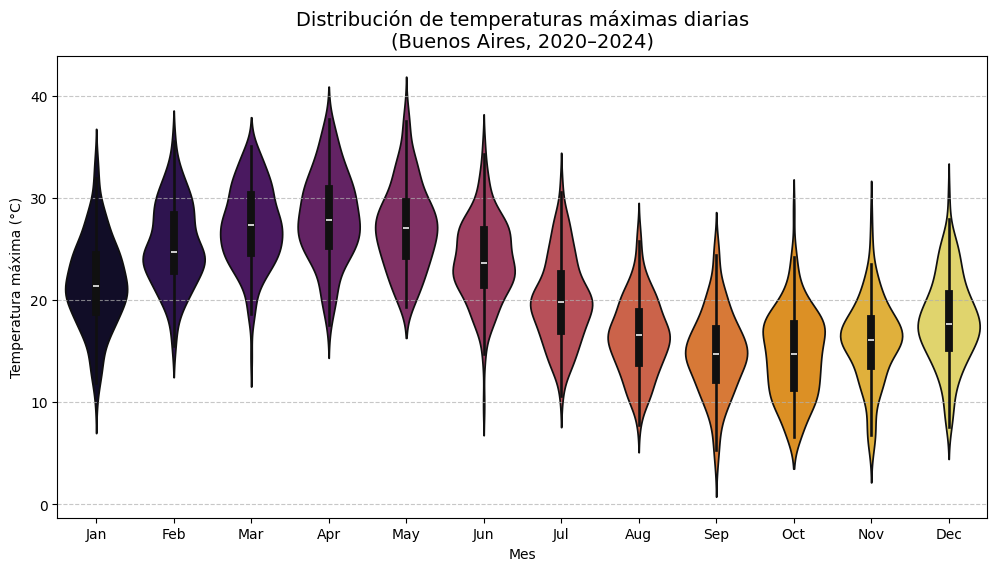

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Parámetros ---
ciudad = "Buenos Aires"
lat, lon = -34.6037, -58.3816  # Coordenadas
start_date = "2020-01-01"
end_date = "2024-12-31"

# --- Crear rango de fechas ---
df = pd.DataFrame({
    'fecha': pd.date_range(start=start_date, end=end_date, freq='D')
})

# --- Simular temperatura máxima diaria (°C) ---
# Basado en promedios reales de Buenos Aires:
# Verano (ene): ~28°C, Invierno (jul): ~14°C
dias_del_año = df['fecha'].dt.dayofyear
temp_promedio = 21 + 7 * np.sin(2 * np.pi * (dias_del_año - 10) / 365.25)  # ciclo anual
ruido = np.random.normal(0, 4, len(df))  # variabilidad diaria
df['temp_max'] = temp_promedio + ruido

# Asegurar que no haya temperaturas absurdas
df['temp_max'] = np.clip(df['temp_max'], -5, 45)

# --- Agregar mes para el gráfico ---
df['mes'] = df['fecha'].dt.month_name().str[:3]
meses_orden = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['mes'] = pd.Categorical(df['mes'], categories=meses_orden, ordered=True)

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='mes', y='temp_max', palette='inferno')
plt.title(f"Distribución de temperaturas máximas diarias\n({ciudad}, 2020–2024)", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Temperatura máxima (°C)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()